### 1- Data preprocessing

In [1]:
import pandas as pd 
tp=pd.read_csv('titanic-passengers.csv',delimiter=';')
tp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


### 1st step : Data cleaning

--> Finding the missing values

In [3]:
tp.isnull().sum().sum()

866

In [4]:
tp.isnull().sum() # Age , Cabin and Embarked are the columns that include missing values . 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

--> Replacing missing values

In [5]:
tp['Age'].fillna(tp['Age'].mean(),inplace=True) # since Age is a numerical feature , we use the mean to replace the missing
                                              # values

In [6]:
# since Embarked is a categorical value , we use the most fequent value to replace the missing values 

In [7]:
tp['Embarked'].value_counts().sort_values(ascending=False)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
# 'S' is the most frequent value so NaNs in column Embarked will be replaced by 'S'

In [9]:
tp['Embarked'].fillna('S',inplace=True)

In [10]:
# Cabin column should be dropped because most of its values are NaNs ( 687 NaNs versus 204 non-NaNs)
tp.drop('Cabin',axis=1,inplace=True)
tp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


### 2nd Step : Data Transformation

In [11]:
#Survived , Sex and Embarked are categorical features that need to be encoded . 

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
tp['Survived']=encoder.fit_transform(tp['Survived'])
tp['Embarked']=encoder.fit_transform(tp['Embarked'])
tp['Sex']=encoder.fit_transform(tp['Sex'])
tp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2


### 2- Data Visualization

In [15]:
# The problem in this dataset is predicting whether or not a passenger with given characteristics would survive 
# the Titanic sinking . We will study the impact of the most important features on the output ( the survival ). 
# The features that seemed important to me are : Sex , Age , Embarked , Pclass , SibSp ,Parch and Fare.
# Let's start by visualizing the distribution of these features 

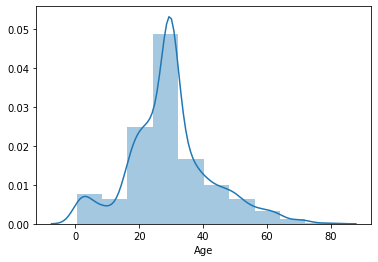

In [16]:
import seaborn as sns
sns.distplot(tp['Age'],hist=True,kde=True,bins=10) 

In [17]:
# --> Nearly 50% of the passengers are in their thirties and around 25% of them are in their twenties . 

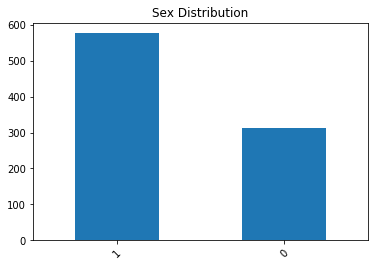

In [18]:
import matplotlib.pyplot as plt 
plt.title('Sex Distribution')
vc=tp['Sex'].value_counts()
vc.plot.bar(rot=45)


In [19]:
# --> Nearly double the female passengers ( encoded with 0 ) are male ( encoded with 1) 

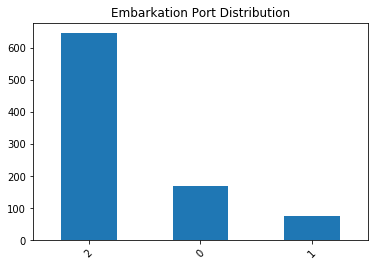

In [20]:
import matplotlib.pyplot as plt 
plt.title('Embarkation Port Distribution')
vc=tp['Embarked'].value_counts()
vc.plot.bar(rot=45)


In [21]:
# --> Most of the passengers embarked in Port S which  refers to Southampton ( encoded with 2 )

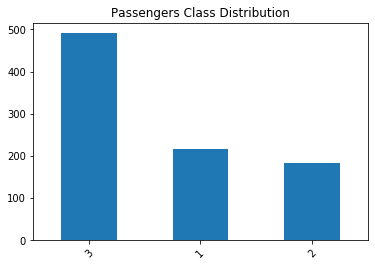

In [22]:
import matplotlib.pyplot as plt 
plt.title('Passengers Class Distribution')
vc=tp['Pclass'].value_counts()
vc.plot.bar(rot=45)


In [23]:
# --> Most of the passengers come from the 3rd class  (then 1st then 2nd)

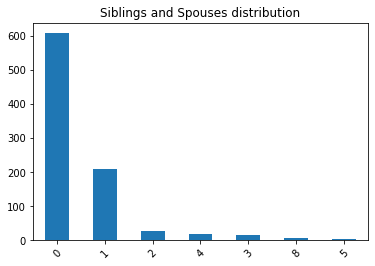

In [24]:
import matplotlib.pyplot as plt 
plt.title('Siblings and Spouses distribution')
vc=tp['SibSp'].value_counts()
vc.plot.bar(rot=45)

In [25]:
# Most of the passengers embarked without their siblings neither their spouses  ( around 600 passengers ) . Few of them 
# (less than a 100 ) , embarked with 2 to 8 siblings or spouses . 

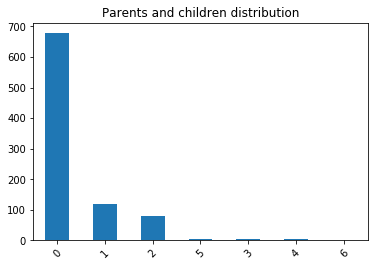

In [26]:
import matplotlib.pyplot as plt 
plt.title('Parents and children distribution')
vc=tp['Parch'].value_counts()
vc.plot.bar(rot=45)

In [27]:
# --> Most of the passengers (a little less than a 700) embarked alone , while a few of them ( less than a 100 ) embarked 
# with their parents and children . 

In [28]:
# Now that we've studied the distribution of the most important features , let's study their correlation and impact on 
# the survival . 

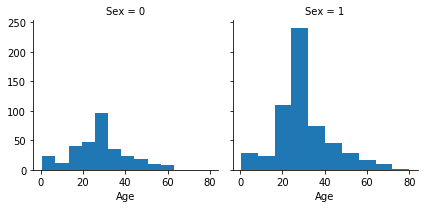

In [29]:
g=sns.FacetGrid(tp,col='Sex')
g.map(plt.hist,'Age',bins=10)


In [30]:
# The distribution of the male passengers age looks the same as the distribution of the female passengers age (Both male 
# and female distributions are concentrated in the thirties age ) 

In [31]:
# Studying the IMPACT of Age and Sex on the survival 

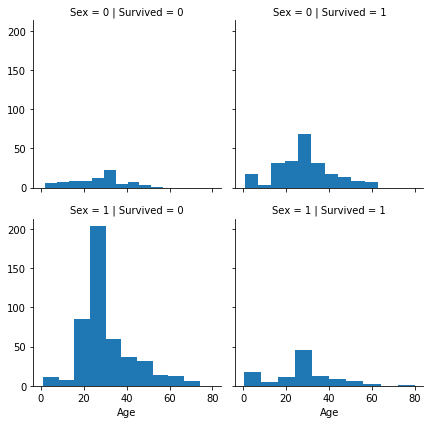

In [32]:
vc=tp['Survived'].value_counts()
g=sns.FacetGrid(tp,row='Sex',col='Survived')
g.map(plt.hist,'Age')
g.add_legend()

In [33]:
# The number of males who didn't survive is much higher than the female non-survivors( Sex=0/Survived=0 compared 
# to Sex=1/Survived=0)
# For both males and females , children ( aged 0 to 5 ) are more likely to survive . 
# However , males aged in their twenties and thirties are more likely to die , while females aged in their twenties and
# are more likely to survive . 

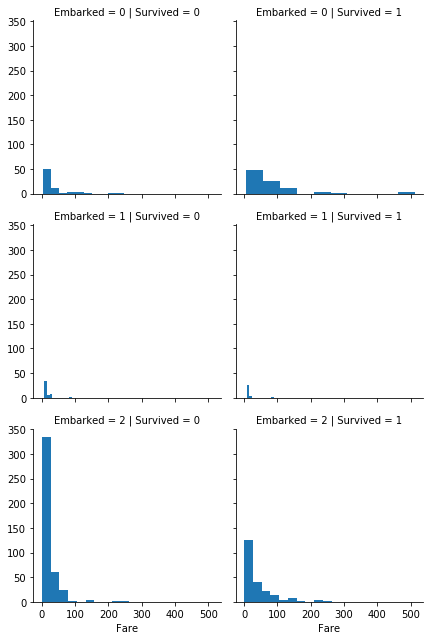

In [34]:
vc=tp['Survived'].value_counts()
g=sns.FacetGrid(tp,row='Embarked',col='Survived')
g.map(plt.hist,'Fare')
g.add_legend()

In [35]:
# Vertical Comparison :
# Embarkation Port impact on Survival :
# The number of survivors who embarked in port 0 ( which refers to C --> Cherbourg(France)) is higher than the non-survivors . 
# The number of survivors  who embarked in port 1 ( which refers to Q --> Queenstown(Ireland)) is lower than the 
# non-survivors . 
# The number of survivors who embarked in port 2 ( which refers to S--> Southampton(England) is higher than the non-survivors.
# Fare impact on Survival : 
# The lower the fare payed is  , the higher is the frequency of death ( that is true for all 3 embarkation ports )
# Horizontal comparison : 
# Embarkation Port impact on Survival : 
# The number of non-survivors who embarked in Southampton ( Port 2 ) is the highest , amongst all three ports . 

In [36]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

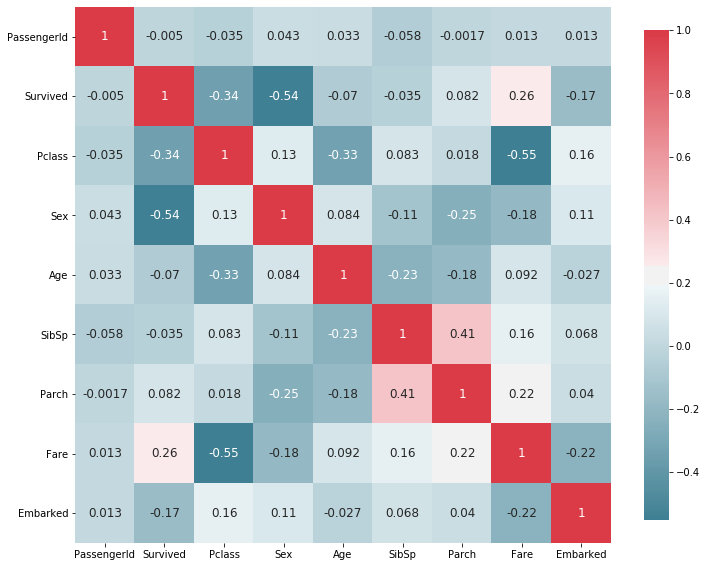

In [37]:
plot_correlation_map(tp)

In [38]:
# This map shows the correlations between each pair of features. The pair of features that represent the highest correlation
# is Parch and SibSp (0,41 as a correlation coefficient ) . The use of the correlation matrix is to verify the reliability 
# of the regression model . The more correlated the features are  , the less reliable the regression model is . 

In [39]:
# Relation between Pclass and Survived

In [40]:
tp[['Pclass','Survived']].groupby('Pclass',as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [41]:
# 62% of the passengers from the 1st class survived , while 47% of the passengers from the 2nd class survived and 24%
# of the passengers from the 3rd class survived . 
# --> The better the class is , the higher the chance of survival is . 

In [42]:
# Dealing with the Name column

In [43]:
tp['Name'].str.split(pat=',')                 # Splitting the column around the ',' 

0                          [Collander,  Mr. Erik Gustaf]
1                             [Moen,  Mr. Sigurd Hansen]
2                              [Jensen,  Mr. Hans Peder]
3         [Palsson,  Mrs. Nils (Alma Cornelia Berglund)]
4                              [Davidson,  Mr. Thornton]
                             ...                        
886               [Nasser,  Mrs. Nicholas (Adele Achem)]
887                             [Sirayanian,  Mr. Orsen]
888                               [Cacic,  Miss. Marija]
889                  [Petroff,  Mr. Pastcho ("Pentcho")]
890    [Phillips,  Miss. Kate Florence ("Mrs Kate Lou...
Name: Name, Length: 891, dtype: object

In [44]:
tp_split=tp['Name'].str.split(pat=',').str.get(1)          # extracting the second element of each list in a new series 
tp_split

0                                        Mr. Erik Gustaf
1                                      Mr. Sigurd Hansen
2                                         Mr. Hans Peder
3                     Mrs. Nils (Alma Cornelia Berglund)
4                                           Mr. Thornton
                             ...                        
886                          Mrs. Nicholas (Adele Achem)
887                                            Mr. Orsen
888                                         Miss. Marija
889                              Mr. Pastcho ("Pentcho")
890     Miss. Kate Florence ("Mrs Kate Louise Phillip...
Name: Name, Length: 891, dtype: object

In [45]:
tp_new_split=tp_split.str.split(pat='.').str.get(0)   # splitting a second time around '.' and extracting the first element 
                                                       # which is the title . 
tp_new_split

0         Mr
1         Mr
2         Mr
3        Mrs
4         Mr
       ...  
886      Mrs
887       Mr
888     Miss
889       Mr
890     Miss
Name: Name, Length: 891, dtype: object

In [46]:
tp['title']=tp_new_split                    # adding the series created to our dataframe tp
tp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2,Mr


In [47]:
tp_final=tp.drop('Name',axis=1) # We drop the Names column because we no longer need it 
tp_final.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,343,0,2,1,28.0,0,0,248740,13.0000,2,Mr
1,76,0,3,1,25.0,0,0,348123,7.6500,2,Mr
2,641,0,3,1,20.0,0,0,350050,7.8542,2,Mr
3,568,0,3,0,29.0,0,4,349909,21.0750,2,Mrs
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,2,Mr


In [48]:
# correlation between title and other features 

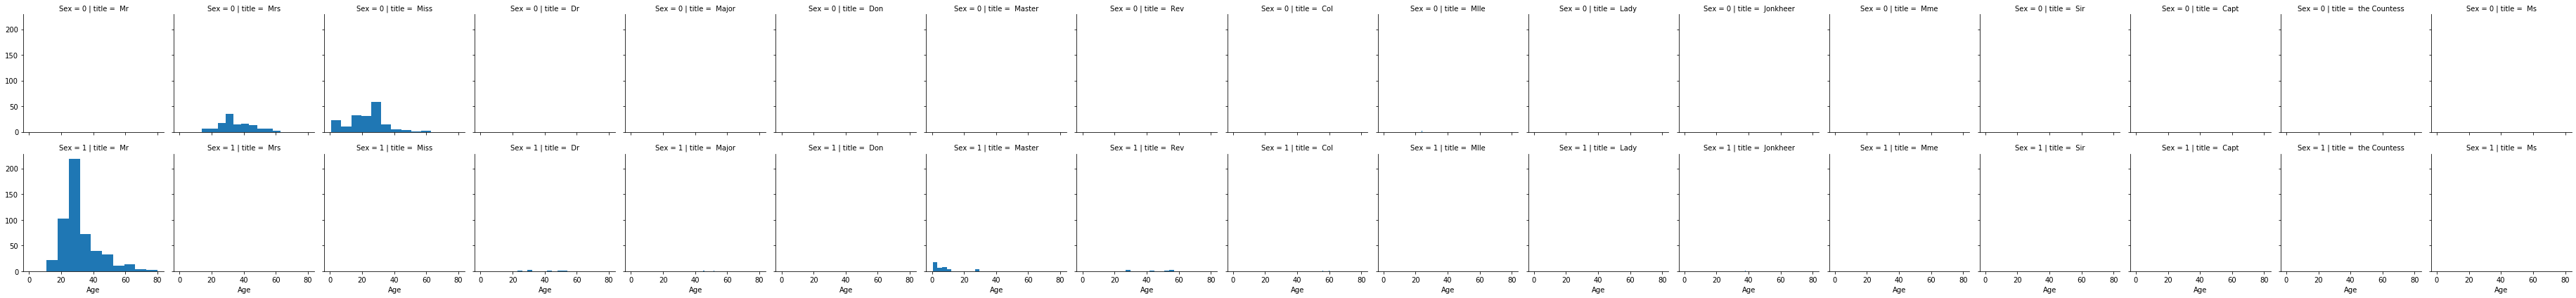

In [49]:
g=sns.FacetGrid(tp_final,col='title',row='Sex')
g.map(plt.hist,'Age')

In [ ]:
# As we can see , the titles are too many which makes the visualization inconvenient . 

In [68]:
Title_Dictionary = { "Capt":     "Officer",
                    
                    "Col":     "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",
                    
                    "Mrs" :       "Mrs",

                    "Mr" :        "Mrs",

                    "Master" :    "Master" } 
tp_grouped=tp_final.replace(to_replace=Title_Dictionary,inplace=False,regex=True)
tp_grouped.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,343,0,2,1,28.0,0,0,248740,13.0000,2,Mrs
1,76,0,3,1,25.0,0,0,348123,7.6500,2,Mrs
2,641,0,3,1,20.0,0,0,350050,7.8542,2,Mrs
3,568,0,3,0,29.0,0,4,349909,21.0750,2,Mrss
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,2,Mrs


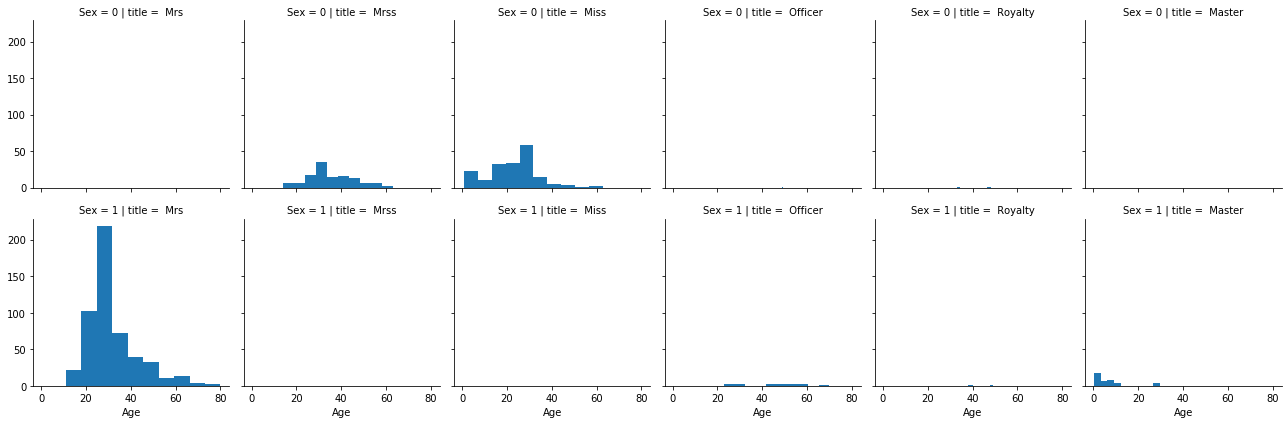

In [66]:
g=sns.FacetGrid(tp_grouped,col='title',row='Sex')
g.map(plt.hist,'Age')

In [93]:
tp_grouped['FamilySize']=tp_grouped['SibSp']+tp_grouped['Parch']

In [94]:
tp_grouped.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,FamilySize
0,343,0,2,1,28.0,0,0,248740,13.0000,2,Mrs,0
1,76,0,3,1,25.0,0,0,348123,7.6500,2,Mrs,0
2,641,0,3,1,20.0,0,0,350050,7.8542,2,Mrs,0
3,568,0,3,0,29.0,0,4,349909,21.0750,2,Mrss,4
4,672,0,1,1,31.0,1,0,F.C. 12750,52.0000,2,Mrs,1


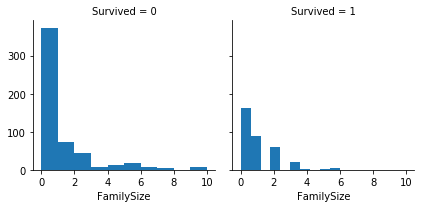

In [95]:
g=sns.FacetGrid(tp_grouped,col='Survived')
g.map(plt.hist,'FamilySize')

In [96]:
FamSize_Survival=tp_grouped[['FamilySize','Survived']].groupby('FamilySize',as_index=True).mean()
FamSize_Survival

,Survived
FamilySize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [97]:
FamSize_Survival.sort_values(by='Survived')

,Survived
FamilySize,
7,0.000000
10,0.000000
5,0.136364
4,0.200000
0,0.303538
6,0.333333
1,0.552795
2,0.578431
3,0.724138


In [99]:
# Travelling with 7 to 10 members of the family makes the survival rate = 0 , while travelling with 1 to 3 members of the 
#family increases the survival chance . 